## Stroke Predictions - Machine Learning

In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
#stroke_df = pd.read_csv('Resources/cleaned_stroke_data.csv')
#stroke_df


In [9]:
#import from API

import requests
import json

data_url = 'https://team-3-project-4.onrender.com/api/v1.0/brain_stroke_data'

response_API = requests.get(data_url)

x = response_API.json()
stroke_df = pd.DataFrame(x)
stroke_df.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,stroke,work_type
0,Urban,67,228.69,36.6,Yes,Male,1,0,9046,formerly smoked,1,Private
1,Rural,80,105.92,32.5,Yes,Male,1,0,31112,never smoked,1,Private
2,Urban,49,171.23,34.4,Yes,Female,0,0,60182,smokes,1,Private
3,Rural,79,174.12,24.0,Yes,Female,0,1,1665,never smoked,1,Self-employed
4,Urban,81,186.21,29.0,Yes,Male,0,0,56669,formerly smoked,1,Private


In [10]:
# Find null values (if any)
for column in stroke_df.columns:
    print(f"Column {column} has {stroke_df[column].isnull().sum()} null values")

# Find duplicate entries (if any)
print(f"Duplicate entries: {stroke_df.duplicated().sum()}")

Column Residence_type has 0 null values
Column age has 0 null values
Column avg_glucose_level has 0 null values
Column bmi has 0 null values
Column ever_married has 0 null values
Column gender has 0 null values
Column heart_disease has 0 null values
Column hypertension has 0 null values
Column id has 0 null values
Column smoking_status has 0 null values
Column stroke has 0 null values
Column work_type has 0 null values
Duplicate entries: 0


In [11]:
# Generate our categorical variable lists
stroke_cat = stroke_df.dtypes[stroke_df.dtypes == "object"].index.tolist()
stroke_df[stroke_cat].nunique()

Residence_type    2
ever_married      2
gender            3
smoking_status    4
work_type         5
dtype: int64

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(stroke_df[stroke_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(stroke_cat)
encode_df.head()

c:\Users\mblazevic\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
stroke_df = stroke_df.merge(encode_df,left_index=True, right_index=True)
stroke_df = stroke_df.drop(stroke_cat,1)
stroke_df.head()

c:\Users\mblazevic\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,age,avg_glucose_level,bmi,heart_disease,hypertension,id,stroke,Residence_type_Rural,Residence_type_Urban,ever_married_No,...,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67,228.69,36.6,1,0,9046,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,80,105.92,32.5,1,0,31112,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,171.23,34.4,0,0,60182,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,79,174.12,24.0,0,1,1665,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,81,186.21,29.0,0,0,56669,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
small_df = stroke_df[['avg_glucose_level', 'bmi', 'heart_disease','hypertension', 'stroke']]
medium_df = stroke_df[['avg_glucose_level', 'bmi', 'heart_disease','hypertension', 'stroke', 'ever_married_Yes, smoking_status_smokes']]

,avg_glucose_level,bmi,heart_disease,hypertension,stroke
0,228.69,36.6,1,0,1
1,105.92,32.5,1,0,1
2,171.23,34.4,0,0,1
3,174.12,24.0,0,1,1
4,186.21,29.0,0,0,1


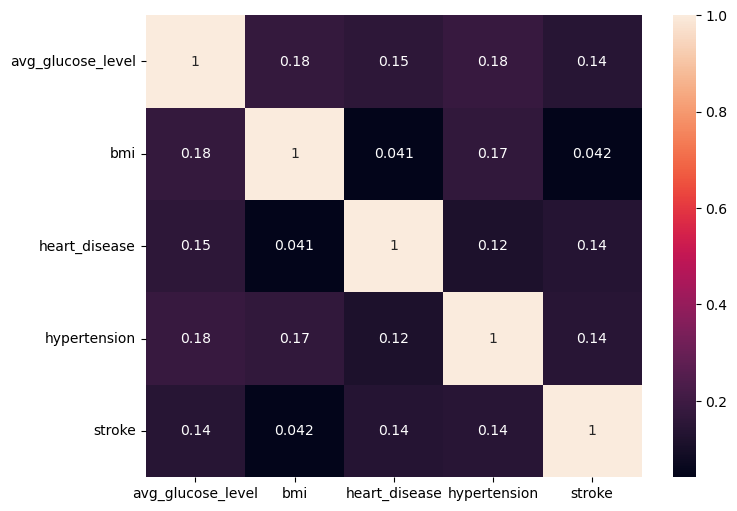

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(small_df.corr(), annot=True)
plt.show()

In [62]:
medium_df = stroke_df[['avg_glucose_level', 'bmi', 'heart_disease','hypertension', 'stroke', 'ever_married_Yes', 'smoking_status_smokes']]
medium_df.head()

,avg_glucose_level,bmi,heart_disease,hypertension,stroke,ever_married_Yes,smoking_status_smokes
0,228.69,36.6,1,0,1,1.0,0.0
1,105.92,32.5,1,0,1,1.0,0.0
2,171.23,34.4,0,0,1,1.0,1.0
3,174.12,24.0,0,1,1,1.0,0.0
4,186.21,29.0,0,0,1,1.0,0.0


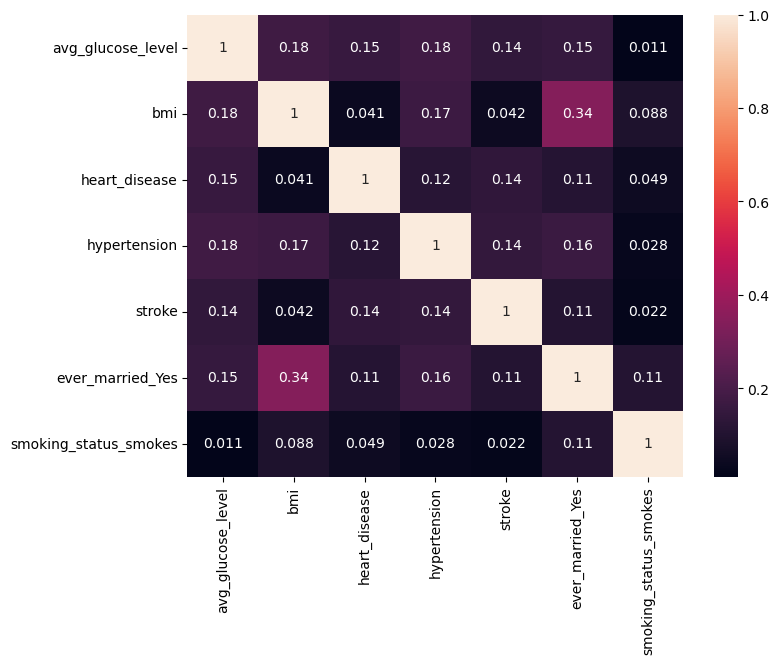

In [65]:
plt.figure(figsize=(8,6))
sns.heatmap(medium_df.corr(), annot=True)
plt.show()

<Figure size 1600x1400 with 0 Axes>

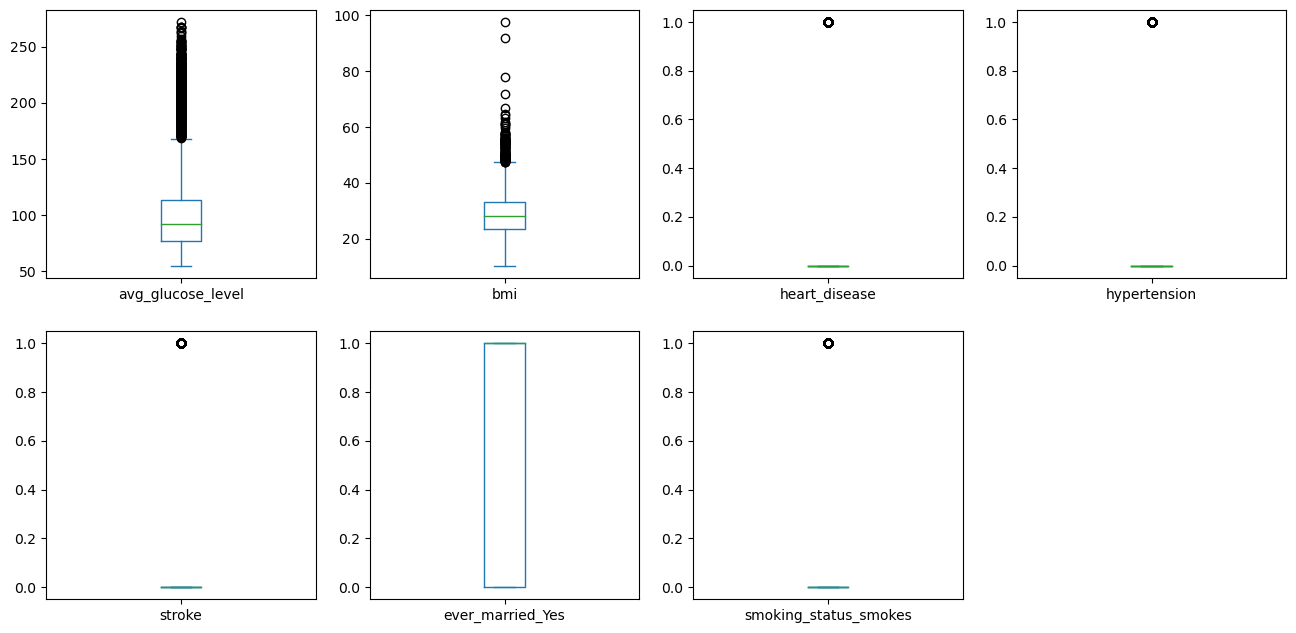

In [67]:
plt.figure(figsize=(16,14))
medium_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(16,16))
plt.show()

In [14]:
# Split our preprocessed data into our features and target arrays
y = stroke_df["stroke"]#.values
X = stroke_df.drop(["stroke"],1)#.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

c:\Users\mblazevic\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Train a Logistic Regression model and print the model score

# Create the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model to the training data. 
model.fit(X_train, y_train)

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")


print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(model.predict(X_test[:10]))}')

Training Data Score: 0.9597935343656615
Testing Data Score: 0.9486970684039088
Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[1165,    0],
       [  63,    0]], dtype=int64)

In [18]:
#The accuracy of the Logistic Regression model on the test data is TP + TN / (TP + FP + TN + FN)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9486970684039088


In [19]:
# Train a Random Forest Classifier model and print the model score
# Import a Random Forests classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9478827361563518


In [20]:
#The accuracy of the Random Forest Classifier on the test data is TP + TN / (TP + FP + TN + FN)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Random Forest Classifier Accuracy: {accuracy}")

Random Forest Classifier Accuracy: 0.9478827361563518


## Logistic Regression is more accurate

In [21]:
# Save the model via pickle

import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [24]:
from plotly import tools
import plotly as py
import plotly.graph_objs as go

p1 = go.Scatter(x=X_test,
                y=y_test,
                mode='markers',
                marker=dict(color='black')
               )

p2 = go.Scatter(x=X_test,
                y=model.predict(X_test),
                mode='lines',
                line=dict(color='blue', width=3)
                )


layout = go.Layout(xaxis=dict(ticks='', showticklabels=True,
                              zeroline=False),
                   yaxis=dict(ticks='', showticklabels=True,
                              zeroline=False),
                   showlegend=True, hovermode='closest')

fig = go.Figure(data=[p1, p2], layout=layout)

py.offline.iplot(fig)

In [26]:
p1 = go.Scatter(x=X_test['bmi'],
                y=X_test['age'],
                mode='markers',
                #color=y
                marker=dict(color=y)
               )


layout = go.Layout(xaxis=dict(ticks='', showticklabels=True,
                              zeroline=False),
                   yaxis=dict(ticks='', showticklabels=True,
                              zeroline=False),
                   showlegend=True, hovermode='closest')

fig = go.Figure(data=[p1], layout=layout)

py.offline.iplot(fig)

In [27]:
p2 = go.Scatter(x=X_test['avg_glucose_level'],
                y=X_test['bmi'],
                mode='markers',
                #color=y
                marker=dict(color=y)
               )


layout = go.Layout(xaxis=dict(ticks='', showticklabels=True,
                              zeroline=False),
                   yaxis=dict(ticks='', showticklabels=True,
                              zeroline=False),
                   showlegend=True, hovermode='closest')

fig2 = go.Figure(data=[p2], layout=layout)

py.offline.iplot(fig2)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.

## add bar charts instead of scatter

In [28]:
import plotly.express as px

stroke_df_order = stroke_df.sort_values(by=["stroke","ever_married_Yes"])

fig = px.bar(stroke_df_order, x="ever_married_Yes", y="stroke", color="ever_married_Yes",
             labels={"ever_married_Yes":"Marital Status", "stroke":"Stroke"},
             title="Marital Status of those with A Stroke").update_layout(title_font_size=16, title_x=0.5)

fig.update_layout(xaxis=dict(tickvals=[0,1], ticktext=['Not Married', 'Married']))
fig.layout.showlegend = False
fig.show()

In [29]:
import plotly.express as px

stroke_df_order = stroke_df.sort_values(by=["stroke","gender_Male"])

fig = px.bar(stroke_df_order, x="gender_Male", y="stroke", color="gender_Male",
             labels={"gender_Male":"Gender", "stroke":"Stroke"},
             title="Gender of those with A Stroke").update_layout(title_font_size=16, title_x=0.5)

fig.update_layout(xaxis=dict(tickvals=[0,1], ticktext=['Male', 'Female']))
fig.layout.showlegend = False
fig.show()

In [33]:
import plotly.express as px

bmi_df_order = stroke_df.sort_values(by=["stroke","bmi"])

figBMI = px.bar(bmi_df_order, x="bmi", y="stroke", color="bmi",
             labels={"bmi":"BMI", "stroke":"Stroke"},
             title="BMI for those who had Stroke").update_layout(title_font_size=16, title_x=0.5)

figBMI.show()

In [34]:
smoke_df_order = stroke_df.sort_values(by=["stroke","smoking_status_smokes", "smoking_status_formerly smoked", "smoking_status_never smoked"])

fig = px.bar(stroke_df_order, x={"smoking_status_smokes", "smoking_status_formerly smoked", "smoking_status_never smoked"}, 
             y="stroke", title="Smoking Status of those with A Stroke")
             #labels={"smoking_status_smokes":"Smoking Status", "stroke":"Stroke"},
             
#.update_layout(title_font_size=16, title_x=0.5)

#fig.update_layout(xaxis=dict(tickvals=[0,1], ticktext=['Never Smoked', 'Former Smoker' 'Smoker']))
fig.layout.showlegend = False
fig.show()

TypeError: 'set' object does not support item assignment

In [35]:
## DO WE NEED THIS ONE**

import plotly.express as px

fig2 = px.bar(stroke_df, x="ever_married_No", y="stroke", color="ever_married_Yes", title="Long-Form Input")
fig2.update_layout(xaxis=dict(tickvals=[0,1], ticktext=['No', 'Yes']))
fig2.show()

In [36]:
for col in stroke_df.columns:
    print(col)

age
avg_glucose_level
bmi
heart_disease
hypertension
id
stroke
Residence_type_Rural
Residence_type_Urban
ever_married_No
ever_married_Yes
gender_Female
gender_Male
gender_Other
smoking_status_Unknown
smoking_status_formerly smoked
smoking_status_never smoked
smoking_status_smokes
work_type_Govt_job
work_type_Never_worked
work_type_Private
work_type_Self-employed
work_type_children
